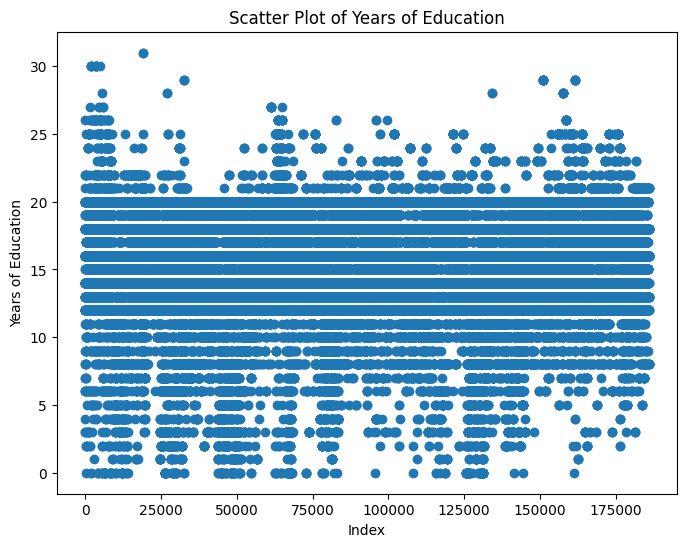

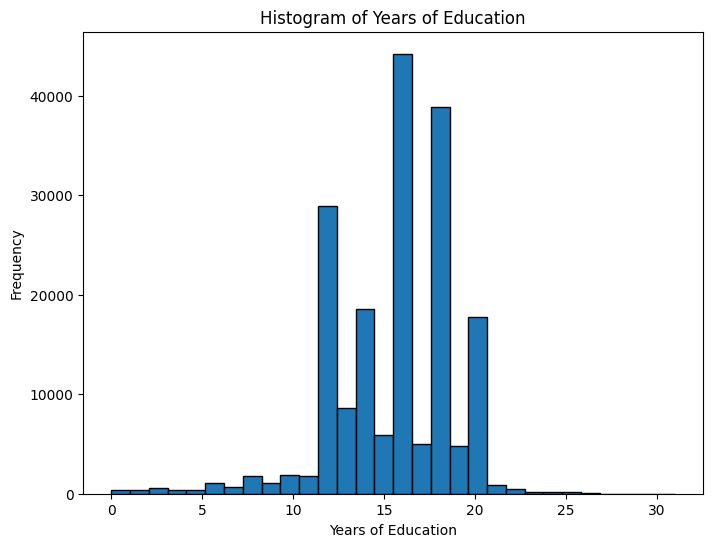

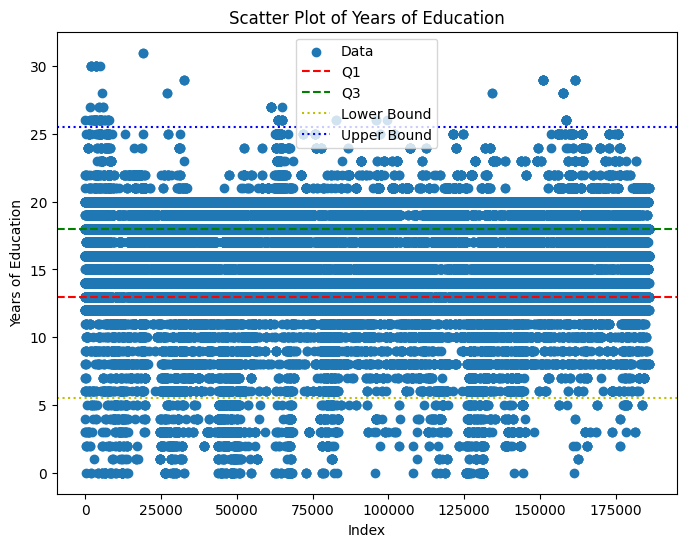

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file = 'experiment1.0.csv'
df = pd.read_csv(file)
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['EDUC'])
plt.title('Scatter Plot of Years of Education')
plt.xlabel('Index')
plt.ylabel('Years of Education')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df['EDUC'], bins=30, edgecolor='black')
plt.title('Histogram of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Frequency')
plt.show()
# Calculate the IQR for the 'EDUC' column
Q1 = df['EDUC'].quantile(0.25)
Q3 = df['EDUC'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['EDUC'], label='Data')

# Add lines for the IQR
plt.axhline(Q1, color='r', linestyle='dashed', label='Q1')
plt.axhline(Q3, color='g', linestyle='dashed', label='Q3')

# Add lines for the upper and lower bounds
plt.axhline(lower_bound, color='y', linestyle='dotted', label='Lower Bound')
plt.axhline(upper_bound, color='b', linestyle='dotted', label='Upper Bound')

plt.title('Scatter Plot of Years of Education')
plt.xlabel('Index')
plt.ylabel('Years of Education')
plt.legend()
plt.show()


In [ ]:

# Define outlier values
educUnknown = 99
cogflagoUnknown = (-4, 888, 999)

# Load the CSV file into a DataFrame
file = 'var_group1.csv'
df = pd.read_csv(file)

# Remove rows with outliers
df_clean = df[(df['EDUC'] != educUnknown) & (
    ~df['COGFLAGO'].isin(cogflagoUnknown))]

# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='EDUC', y='COGFLAGO', data=df_clean)
plt.title('Scatterplot: EDUC vs COGFLAGO')
plt.xlabel('Years of Education')
plt.ylabel('At what age did fluctuating cognition begin?')
plt.show()


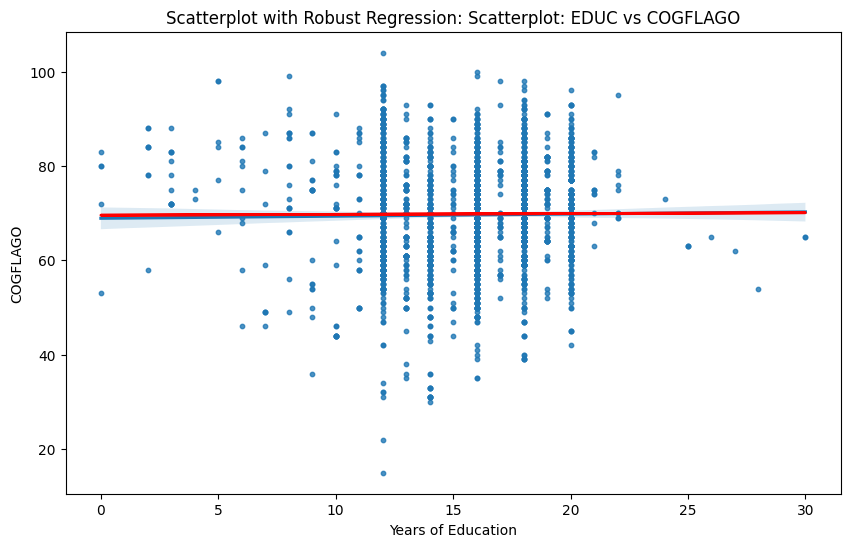

c:\Users\Andrew\Desktop\URDC\venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Andrew\AppData\Local\Temp\ipykernel_25128\2166759730.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['EDUC_log'] = np.log(df_clean['EDUC'])
C:\Users\Andrew\AppData\Local\Temp\ipykernel_25128\2166759730.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['COGFLAGO_log'] = np.log(df_clean['COGFL

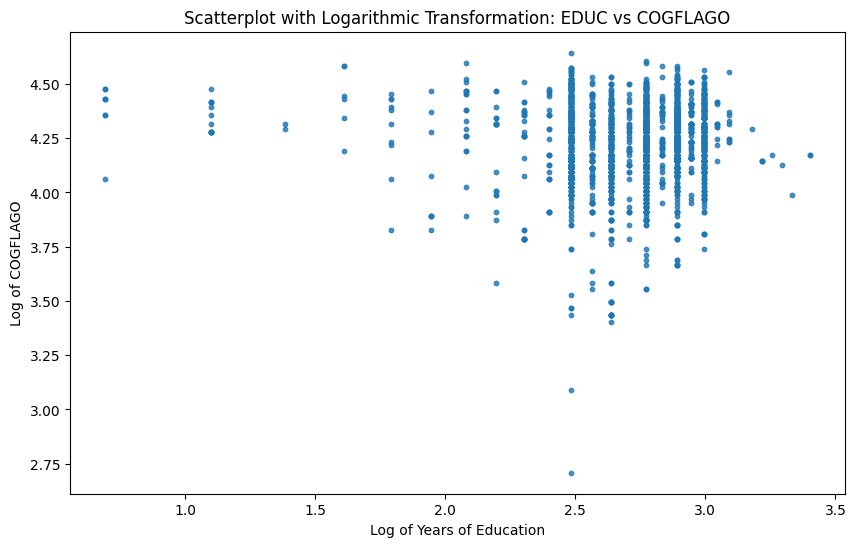

In [ ]:
import numpy as np
from sklearn.linear_model import HuberRegressor
# Define outlier values
educUnknown = 99
cogflagoUnknown = (-4, 888, 999)

# Load the CSV file into a DataFrame
file = 'var_group1.csv'
df = pd.read_csv(file)

# Remove rows with outliers
df_clean = df[(df['EDUC'] != educUnknown) & (
    ~df['COGFLAGO'].isin(cogflagoUnknown))]

huber = HuberRegressor()
huber.fit(df_clean[['EDUC']], df_clean['COGFLAGO'])
# Plot the scatterplot with the robust regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='EDUC', y='COGFLAGO', data=df_clean, scatter_kws={'s': 10})
plt.plot(df_clean['EDUC'], huber.predict(
    df_clean[['EDUC']]), color='red', linewidth=2)
plt.title('Scatterplot with Robust Regression: Scatterplot: EDUC vs COGFLAGO')
plt.xlabel('Years of Education')
plt.ylabel('COGFLAGO')
plt.show()

# Logarithmic transformation
df_clean['EDUC_log'] = np.log(df_clean['EDUC'])
df_clean['COGFLAGO_log'] = np.log(df_clean['COGFLAGO'])
df['EDUC_log'] = np.log1p(df['EDUC'])
df['COGMEM_log'] = np.log1p(df['COGMEM'])
plt.figure(figsize=(10, 6))
sns.regplot(x='EDUC_log', y='COGFLAGO_log', data=df_clean,
            scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Scatterplot with Logarithmic Transformation: EDUC vs COGFLAGO')
plt.xlabel('Log of Years of Education')
plt.ylabel('Log of COGFLAGO')
plt.show()
